In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from src.postproces_classificationresults import *
from src.plotting import *
from src.preproces import Handle_Files

import pickle

file_handler = Handle_Files()
model_name = 'LR'

In [2]:
dict_dir = f'D:/Programmering/msc/Masterthesis_S23-Results/dicts/{model_name}'

with open('/'.join([dict_dir, f'classification_summaries_{model_name}.pkl']), 'rb') as file:
    classification_summaries = pickle.load(file)

with open('/'.join([dict_dir, f'target_summaries_{model_name}.pkl']), 'rb') as file:
    target_summaries = pickle.load(file)

with open('/'.join([dict_dir, f'roc_information_{model_name}.pkl']), 'rb') as file:
    roc_information = pickle.load(file)

# Performance development

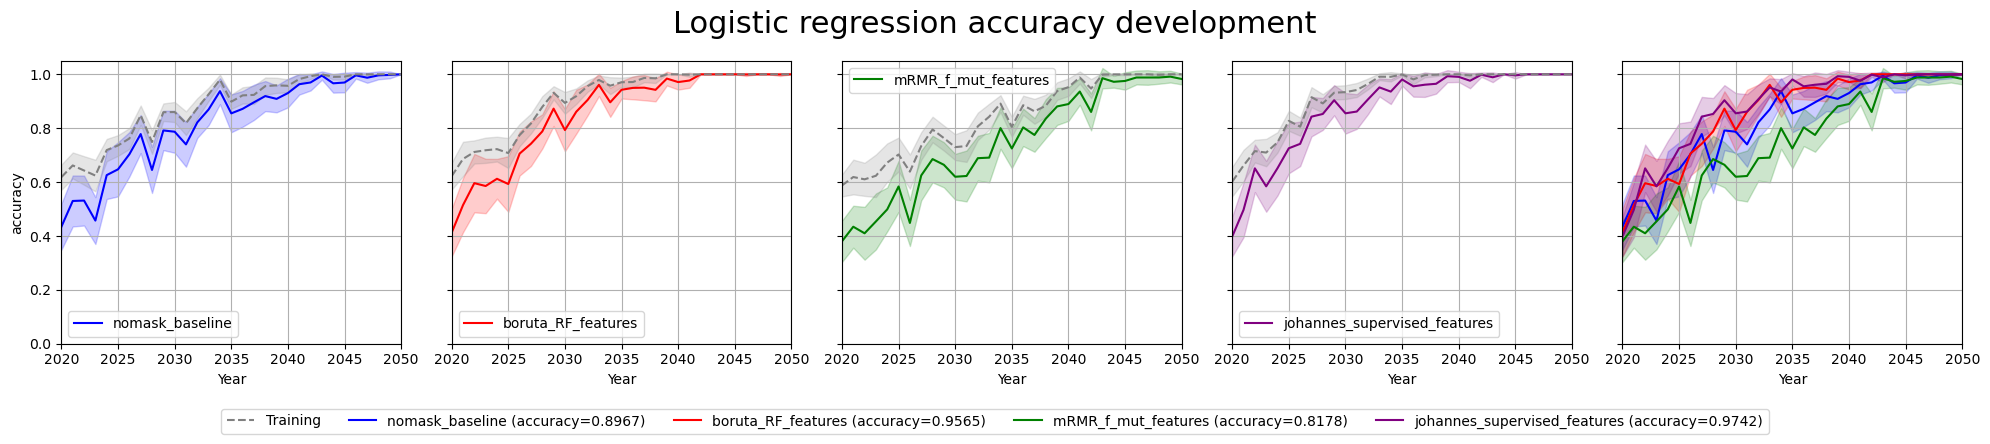

In [13]:
plot_performance(classification_summaries, metric='accuracy', years=list(range(2020, 2051)), 
                 model_name='Logistic Regression', spread=True, 
                 summary_subplot_for_spread=True, 
                 include_train=True, 
                 report_performance=list(range(2035, 2041)))

# ROC and AUC analysis

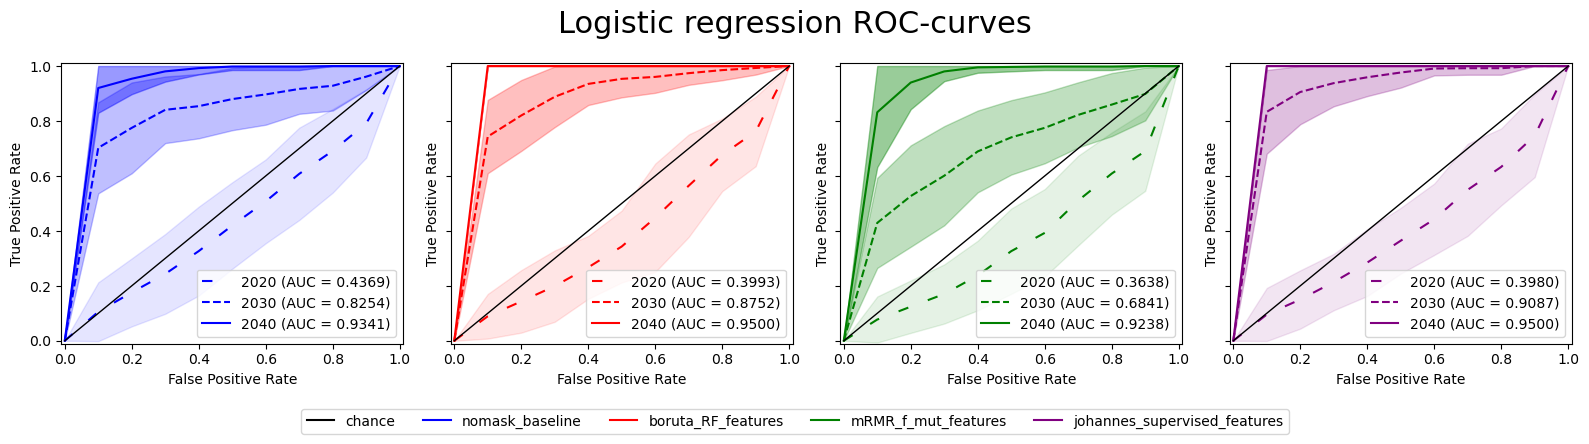

In [4]:
plot_roc_curve(roc_information, years=[2020, 2030, 2040], 
               model_name='Logistic Regression', title=None, 
               spread=True, summary_subplot_for_spread=False)

# Table representation

In [19]:
accuracy_df_long = create_plotdata_from_summary(classification_summaries, 'accuracy', years=list(range(2020, 2051)), include_train=True)
f1_df_long = create_plotdata_from_summary(classification_summaries, 'f1-score', years=list(range(2020, 2051)), include_train=True)

summary_df_acc = accuracy_df_long[accuracy_df_long['Year'].between(2035, 2040)].groupby(['feature_comb_key']).mean().reset_index()
summary_df_acc = summary_df_acc[['feature_comb_key', 'accuracy', 'training_accuracy']]
summary_df_acc.columns = ['feature_comb_key', 'accuracy test', 'accuracy training']

summary_df_f1 = f1_df_long[f1_df_long['Year'].between(2035, 2040)].groupby(['feature_comb_key']).mean().reset_index()
summary_df_f1 = summary_df_f1[['feature_comb_key', 'f1-score', 'training_f1-score']]
summary_df_f1.columns = ['feature_comb_key', 'f1-score test', 'f1-score training']

summary_df = summary_df_acc.merge(summary_df_f1, on='feature_comb_key')
for col in summary_df.columns:
    if col != 'feature_comb_key':
        summary_df[col] = summary_df[col].round(4)

summary_df


,feature_comb_key,accuracy test,accuracy training,f1-score test,f1-score training
0,boruta_RF_features,0.9565,0.9855,0.9522,0.9868
1,johannes_supervised_features,0.9742,0.9959,0.9715,0.9963
2,mRMR_f_mut_features,0.8178,0.8875,0.8143,0.8908
3,nomask_baseline,0.8967,0.9359,0.8898,0.9358


# Used hyperparameters

This performance was acchived using these models:

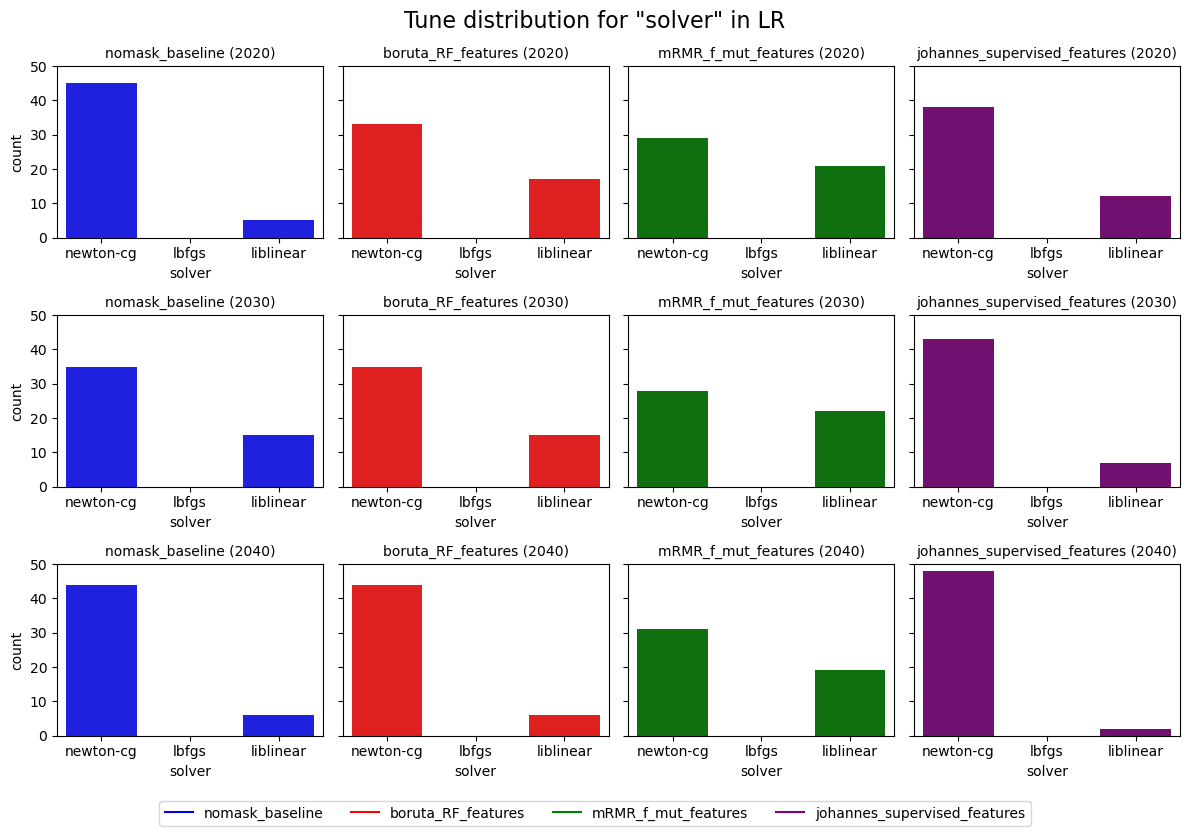

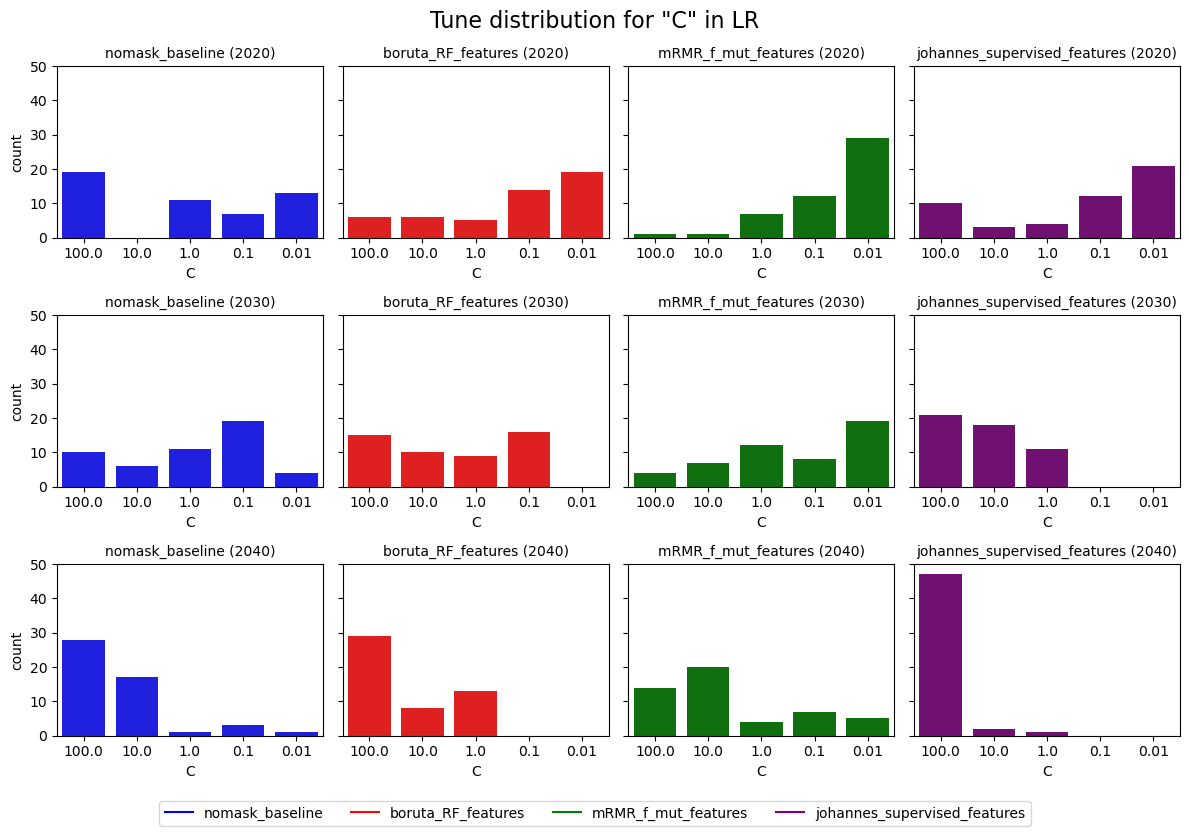

In [5]:
param_grid = {
        'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'penalty': ['l2'],
        'C': [100, 10, 1.0, 0.1, 0.01]
    }

plot_hyperparameters(target_summaries, model_name, years=[2020, 2030, 2040], param_grid=param_grid)

- add confusion matrix


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns